In [1]:
# Code for Descriptive Statistics with Direct Download

import pandas as pd
import requests
import sklearn
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
# Load the dataset
df = pd.read_csv("Cardio.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


# Summary statistics and EDA

In [3]:
#checking the total number of rows and columns
df.shape

(68205, 17)

In [4]:
#checking format of the data 
df.dtypes

id                       int64
age                      int64
gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
age_years                int64
bmi                    float64
bp_category             object
bp_category_encoded     object
dtype: object

In [5]:
#table showing summary statistics for numeric columns
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [6]:
# remove the age in days, already have the age in years
df = df.drop('age',axis = 1)


In [7]:
#displaying summary statiscics for categorical columns
df.describe(include=['O'])

,bp_category,bp_category_encoded
count,68205,68205
unique,4,4
top,Hypertension Stage 1,Hypertension Stage 1
freq,39750,39750


# Visual inspection of the data

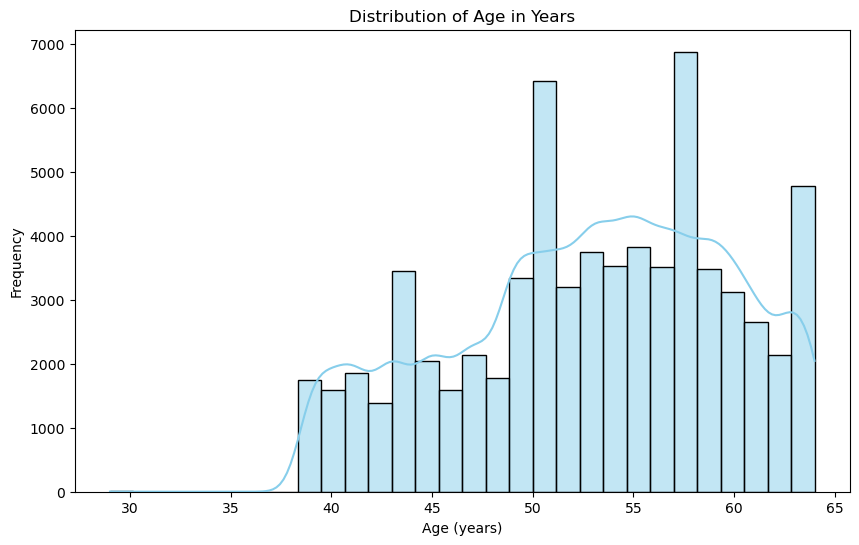

In [8]:
# Plotting Age Distribution for visualisation

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Age in Years')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

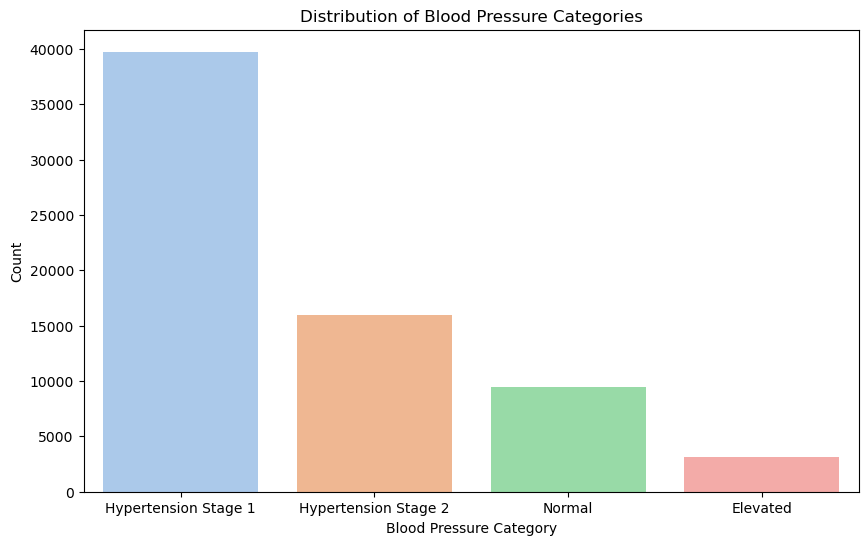

In [9]:
# Plotting the distribution of blood pressure categories for visualisation
plt.figure(figsize=(10, 6))
sns.countplot(x='bp_category', data=df, palette='pastel')

# Add labels and title
plt.title('Distribution of Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')

# Show the plot
plt.show()

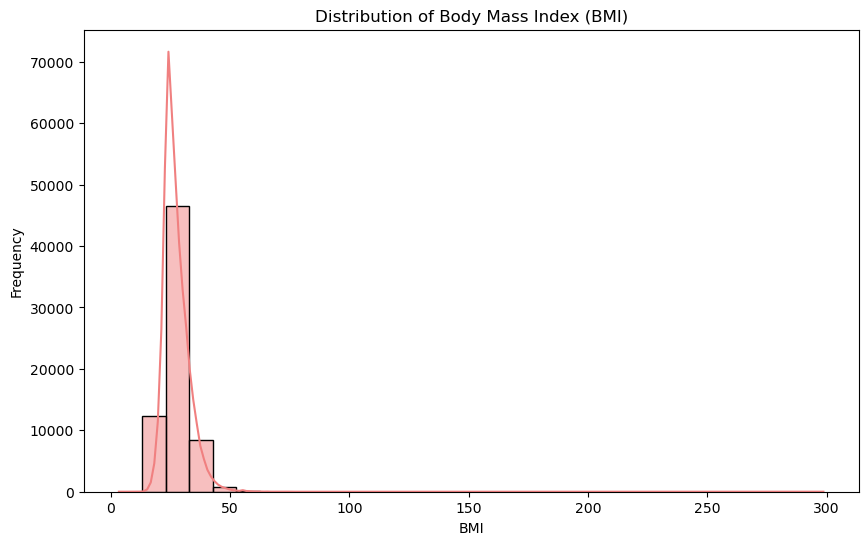

In [10]:
# BMI Distribution Visualisation
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='lightcoral')

# Add labels and title
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Show the plot
plt.show()

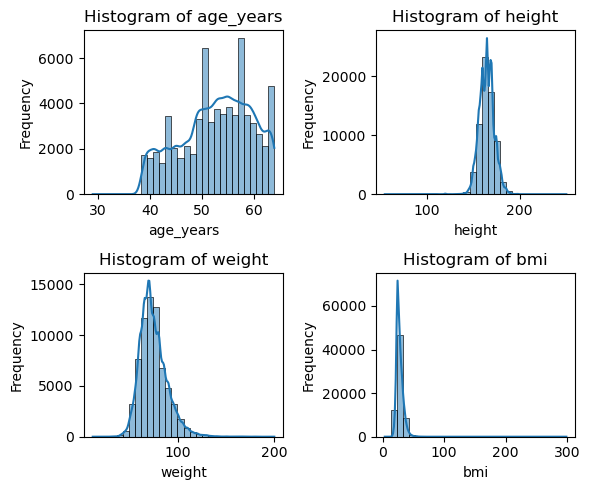

In [11]:
#visual inspection of numeric data for outliers 

continuous_columns = ['age_years', 'height', 'weight', 'bmi']

fig, axs = plt.subplots(2, 2, figsize=(6, 5))
axs = axs.flatten()

for col, ax in zip(continuous_columns, axs):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Chapter 3: Data Preparation and Cleaning

In [12]:
#check for missing values
df.isnull().sum()

id                     0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [13]:
#check for duplicate rows
df.duplicated().sum()

0

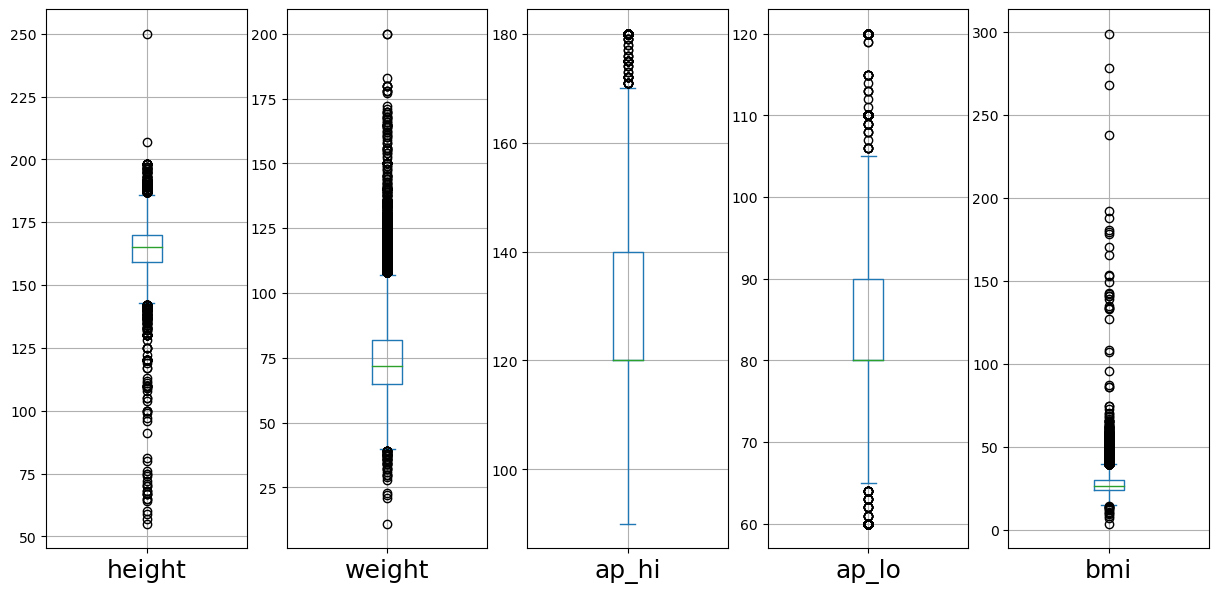

In [14]:
#some plots seem slightly skewed so further visual inspection of outliers 

interest_var = ['height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
axes = df[interest_var].plot(kind='box', subplots=True, grid=True, figsize=(15, 7))
for ax in axes:
    ax.tick_params(axis='x', labelsize=18)  
plt.show()

In [15]:
#both visualisations show some skew and several outliers so we will carry out further statistical tests to fix outliers

#calculating Z-scores for continuous variables
z_scores_df = df[continuous_columns].apply(zscore)

# Identify rows where any column has a Z-score greater than 3 or less than -3
outliers = np.any((z_scores_df > 3) | (z_scores_df < -3), axis=1)

# Display the number of outliers identified for each column
outliers_by_column = (z_scores_df > 3) | (z_scores_df < -3)
outliers_count = outliers_by_column.sum()
outliers_count

age_years      4
height       285
weight       708
bmi          520
dtype: int64

In [16]:
# initial check to see if the minimum and maximum value are within the realistic range for the variables with high number of outliers
df[['weight', 'age_years', 'height', 'ap_hi', 'ap_lo']].agg(['min', 'max', 'mean'])

#some of the heights and weights are unrealistic so we will use the three sigma rule to calculate 3 standard deviations
#to get a range in which 99.7% of the data falls


,weight,age_years,height,ap_hi,ap_lo
min,11.000000,29.000000,55.000000,90.000000,60.000000
max,200.000000,64.000000,250.000000,180.000000,120.000000
mean,74.100688,52.823635,164.372861,126.434924,81.263925


In [17]:
# some of the heights and weights are unrealistic so we will use the three sigma rule to calculate 3 standard deviations
# to get a range in which 99.7% of the data falls

In [18]:
# Calculating a lower and upper bound based on 3 std deviations from the mean

# Height
mean_height = df['height'].mean()
std_height = df['height'].std()

height_lower_bound = mean_height - 3 * std_height
height_upper_bound = mean_height + 3 * std_height
# we will use these values to remove outliers that are more than 3 standard deviations from the mean
# this will remove unrealistic heights from the dataset

# Weight
mean_weight = df['weight'].mean()
std_weight = df['weight'].std()
# calculating a lower and upper bound based on 3 std deciations from the mean
weight_lower_bound = mean_weight - 3 * std_weight
weight_upper_bound = mean_weight + 3 * std_weight

# Bmi
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()
# calculating a lower and upper bound based on 3 std deciations from the mean
bmi_lower_bound = mean_bmi - 3 * std_bmi
bmi_upper_bound = mean_bmi + 3 * std_bmi

# Systolic blood pressure 
mean_ap_hi = df['ap_hi'].mean()
std_ap_hi = df['ap_hi'].std()
# calculating a lower and upper bound based on 3 std deciations from the mean
ap_hi_lower_bound = mean_ap_hi - 3 * std_ap_hi
ap_hi_upper_bound = mean_ap_hi + 3 * std_ap_hi

# Diastolic blood pressure
mean_ap_lo = df['ap_lo'].mean()
std_ap_lo = df['ap_lo'].std()
# calculating a lower and upper bound based on 3 std deciations from the mean
ap_lo_lower_bound = mean_ap_lo - 3 * std_ap_lo
ap_lo_upper_bound = mean_ap_lo + 3 * std_ap_lo



print(' 99.7% of the height values fall between',  round(height_lower_bound), 'cm and', round(height_upper_bound), 'cm', '\n',
'99.7% of the weight values fall between',  round(weight_lower_bound), 'kg and', round(weight_upper_bound), 'kg', '\n',
'99.7% of the bmi values fall between',  round(bmi_lower_bound), 'and', round(bmi_upper_bound), '\n',
'99.7% of the systolic blood pressure values fall between',  round(ap_hi_lower_bound), 'and', round(ap_hi_upper_bound), '\n',
'99.7% of the diastolic blood pressure values fall between',  round(ap_lo_lower_bound), ' and', round(ap_lo_upper_bound))



 99.7% of the height values fall between 140 cm and 189 cm 
 99.7% of the weight values fall between 31 kg and 117 kg 
 99.7% of the bmi values fall between 9 and 46 
 99.7% of the systolic blood pressure values fall between 79 and 174 
 99.7% of the diastolic blood pressure values fall between 54  and 109


In [19]:
# Set realistic blood pressure ranges
height_lower_limit = 140
height_upper_limit = 193
bmi_lower_limit = 12
bmi_upper_limit = 46
systolic_lower_limit = 80
systolic_upper_limit = 200
diastolic_lower_limit = 40
diastolic_upper_limit = 120


In [20]:
 
# Filtering out values outwith the 99.7% range to remove unrealistic values and outliers
outlier_filter = (
    (df['height'] >= height_lower_limit) & (df['height'] <= height_upper_limit) &
    (df['ap_hi'] >= systolic_lower_limit) & (df['ap_hi'] <= systolic_upper_limit) &
    (df['ap_lo'] >= diastolic_lower_limit) & (df['ap_lo'] <= diastolic_upper_limit) &
    (df['bmi'] >= bmi_lower_limit) & (df['bmi'] <= bmi_upper_limit)
)

# Number of rows that don't meet the domain-specific criteria
unrealistic_values_count = len(df) - outlier_filter.sum()

unrealistic_values_count


571

In [21]:
# There due to the amount of outliers and unrealistic data in the dataset
# we will filter out outliers using 3 standard deviations from the mean  

df_cleaned = df[outlier_filter].copy()

# Display shape of the final cleaned datasets to show how many rows were removed
print("Shape of Original Dataset:", df.shape, "\nShape of Cleaned Dataset:", df_cleaned.shape)

Shape of Original Dataset: (68205, 16) 
Shape of Cleaned Dataset: (67634, 16)


In [22]:
df_cleaned.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000,67634.000000
mean,49983.997013,1.349824,164.484638,73.786037,126.372934,81.235192,1.361919,1.223660,0.087929,0.053154,0.803619,0.492637,52.820194,27.297880
std,28849.224881,0.476918,7.757191,13.594564,15.923359,9.126100,0.677118,0.569581,0.283194,0.224342,0.397263,0.499949,6.769779,4.881254
min,0.000000,1.000000,140.000000,30.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,12.254473
25%,25006.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50037.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.291724
75%,74885.750000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.091432
max,99999.000000,2.000000,193.000000,165.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,45.985249


In [23]:
#checking to see how much of the data was removed 
# just under 3% of the data were removed when removing outliers 
67634 / 68205 * 100

100 - 99.16281797522176


0.8371820247782438

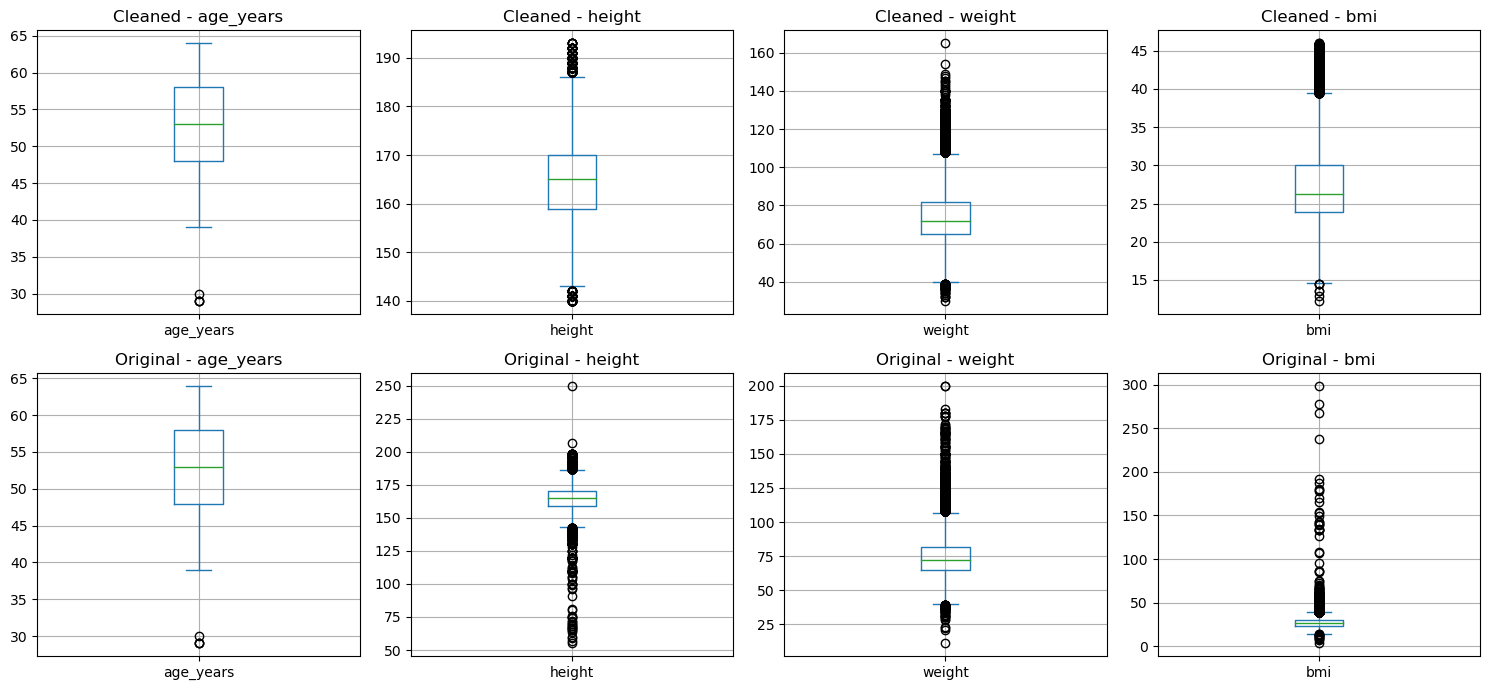

In [24]:
# visual inspection of outliers in new dataset compared to pre-cleaned dataset using box plot

# Number of continuous columns
n = len(continuous_columns)

# Create a figure and a 2xN grid of subplots (2 rows for the two DataFrames)
fig, axes = plt.subplots(2, n, figsize=(15, 7))

# Flatten the array of subplots
axes = axes.flatten()

# Loop through each continuous column and plot
for i, col in enumerate(continuous_columns):
    df_cleaned[col].plot(kind='box', grid=True, ax=axes[i], title=f'Cleaned - {col}')
    df[col].plot(kind='box', grid=True, ax=axes[n + i], title=f'Original - {col}')

plt.tight_layout()
plt.show()

In [25]:
# Categorise BMI according to standard categories
def categorise_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

    
df_cleaned['bmi_category'] = df_cleaned['bmi'].apply(categorise_bmi)


In [26]:
# encoding categorical variables to integers

# Specify the custom order for each column
custom_order = [['Underweight', 'Normal', 'Overweight', 'Obesity'],  # for 'bmi_category'
                ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']]  # for 'bp_category'

# Initialize the encoder with the custom order
enc = OrdinalEncoder(categories=custom_order)

# Fit and transform the DataFrame columns
df_cleaned[['bmi_category_encoded', 'bp_category_encoded']] = enc.fit_transform(df_cleaned[['bmi_category', 'bp_category']])


# Show the DataFrame
df_cleaned.head()


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,bmi_category,bmi_category_encoded
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,2.0,Normal,1.0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,3.0,Obesity,3.0
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,2.0,Normal,1.0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,3.0,Overweight,2.0
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,0.0,Normal,1.0


In [27]:
categorical_columns = ['gender', 'bp_category_encoded', 'cholesterol', 'gluc', 'smoke', 'alco', 'cardio', 'bmi_category_encoded']


In [28]:
df_cleaned[categorical_columns].apply(lambda x:x.unique())

gender                                [2, 1]
bp_category_encoded     [2.0, 3.0, 0.0, 1.0]
cholesterol                        [1, 3, 2]
gluc                               [1, 2, 3]
smoke                                 [0, 1]
alco                                  [0, 1]
cardio                                [0, 1]
bmi_category_encoded    [1.0, 3.0, 2.0, 0.0]
dtype: object

In [29]:
df_cleaned.shape

(67634, 18)

## Visualising relationships in cleaned dataset

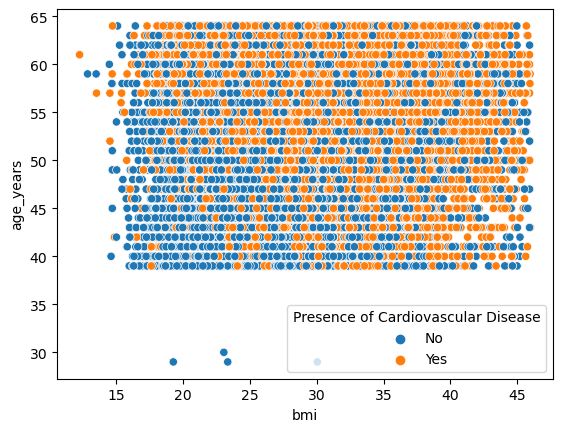

In [30]:
#using scatterplots to visualise relationship between age and bmi in our sample 

df_cleaned['Presence of Cardiovascular Disease'] = df_cleaned['cardio'].map({0: 'No', 1: 'Yes'})

# Plot using the new column for the hue
g = sns.scatterplot(x="bmi", y="age_years",
              hue="Presence of Cardiovascular Disease",
              data=df_cleaned)  



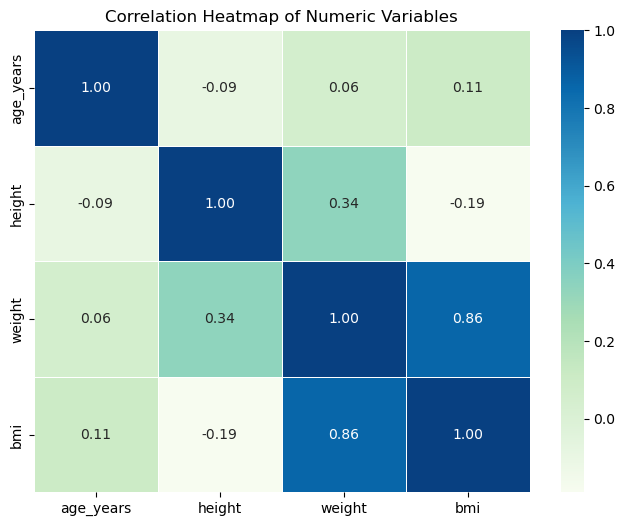

,age_years,height,weight,bmi
age_years,1.000000,-0.087071,0.055745,0.106875
height,-0.087071,1.000000,0.336162,-0.188948
weight,0.055745,0.336162,1.000000,0.856889
bmi,0.106875,-0.188948,0.856889,1.000000


In [31]:
pearson_corr = df_cleaned[continuous_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap="GnBu", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()
pearson_corr

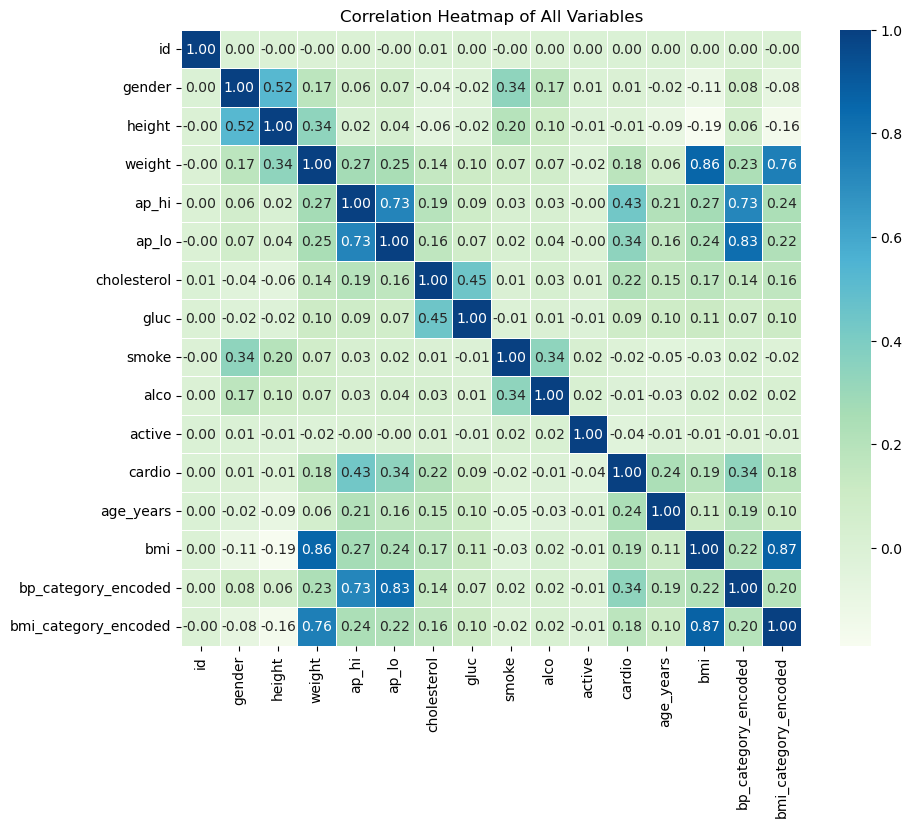

In [32]:
#creating a heat map
corr_matrix = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="GnBu", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of All Variables")
plt.show()

# UNSUPERVISED ANALYSIS

### Code for K-Means Clustering

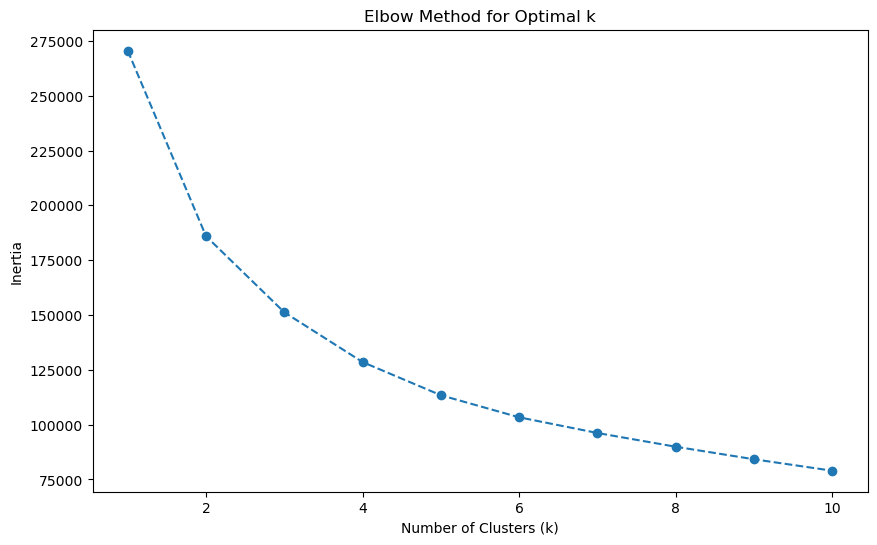

In [33]:
# Selecting features for clustering
features_for_clustering = ['age_years', 'bmi', 'ap_hi', 'ap_lo']

# Standardizing the features
df_standardized = (df_cleaned[features_for_clustering] - df_cleaned[features_for_clustering].mean()) / df_cleaned[features_for_clustering].std()

# Determining optimal number of clusters (k) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [34]:
# Fitting K-Means with optimal k
kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['cluster_kmeans'] = kmeans_optimal.fit_predict(df_standardized)
# Code for Cluster Profiles
cluster_profiles = df_cleaned.groupby('cluster_kmeans')[features_for_clustering].mean()
print("Cluster Profiles (K-Means):\n", cluster_profiles)

Cluster Profiles (K-Means):
                 age_years        bmi       ap_hi      ap_lo
cluster_kmeans                                             
0               45.692722  25.479340  115.957278  75.745605
1               57.266433  26.772638  121.009071  78.404623
2               54.349412  30.059305  145.554429  91.349882


### Selecting a random subset of the data which should reduce the computational load.

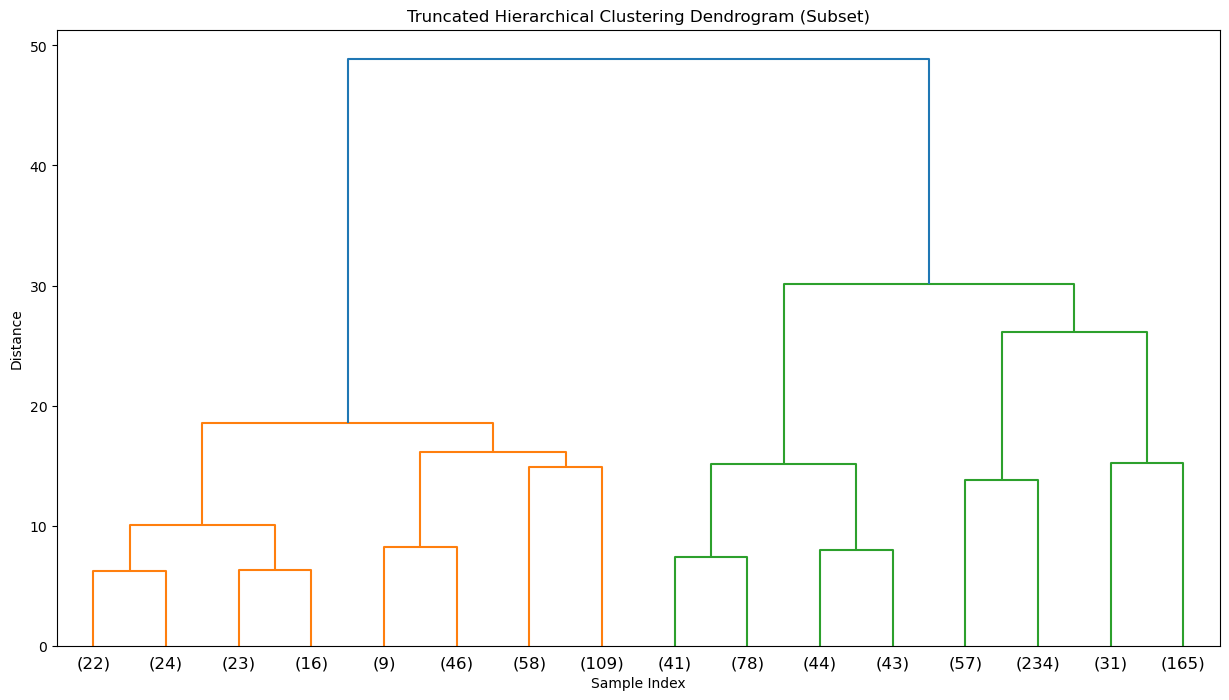

In [35]:


# Code for Hierarchical Clustering with a Subset of Data
subset_size = 1000  # You can change this to a smaller number based on your requirements
subset_indices = np.random.choice(df_standardized.index, size=subset_size, replace=False)
df_subset = df_standardized.loc[subset_indices]

# Using AgglomerativeClustering on the subset
hierarchical_optimal_subset = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
df_cleaned_subset = df_cleaned.loc[subset_indices].copy()
df_cleaned_subset['cluster_hierarchical'] = hierarchical_optimal_subset.fit_predict(df_subset)

# Plotting the dendrogram for the subset
linkage_matrix_subset = linkage(df_subset, method='ward', metric='euclidean')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix_subset, truncate_mode='level', p=3)  # Adjust 'p' based on your preference
plt.title('Truncated Hierarchical Clustering Dendrogram (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [36]:
# Code for Assigning Hierarchical Clusters with Subset

# Select a random subset of the data (adjust the subset size as needed)
subset_size = 1000  # You can change this to a smaller number based on your requirements
subset_indices = np.random.choice(df_standardized.index, size=subset_size, replace=False)
df_subset = df_standardized.loc[subset_indices]

# Using AgglomerativeClustering on the subset
hierarchical_optimal_subset = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
df_cleaned_subset = df_cleaned.loc[subset_indices].copy()
df_cleaned_subset['cluster_hierarchical'] = hierarchical_optimal_subset.fit_predict(df_subset)

# Assigning the clusters to the entire dataset based on the optimal clusters from the subset
df_cleaned['cluster_hierarchical'] = df_cleaned_subset['cluster_hierarchical']


In [37]:
# Code for Hierarchical Cluster Profiles
cluster_profiles_hierarchical = df_cleaned.groupby('cluster_hierarchical')[features_for_clustering].mean()
print("Cluster Profiles (Hierarchical):\n", cluster_profiles_hierarchical)

Cluster Profiles (Hierarchical):
                       age_years        bmi       ap_hi      ap_lo
cluster_hierarchical                                             
0.0                   55.139535  30.528007  139.131783  88.746770
1.0                   55.485646  25.368433  119.227273  77.370813
2.0                   43.625641  25.012324  115.230769  75.071795


# This part is contributed by Kelsey Mclachlan

#  SUPERVISED ANALYSIS

### Code for Linear Regression with Train-Test Split

In [38]:

# Selecting features and target variable
features_for_regression = ['age_years', 'bmi', 'ap_hi', 'ap_lo']
target_variable = 'cardio'

# Splitting the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_cleaned[features_for_regression], df_cleaned[target_variable], test_size=0.3, random_state=42)


# Initializing and fitting the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("\nLinear Regression Evaluation:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)




Linear Regression Evaluation:
Mean Squared Error: 0.19562009903050853
R-squared: 0.2172319134501366


### Code for Logistic Regression with Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting features and target variable
features_for_logistic = ['age_years', 'bmi', 'ap_hi', 'ap_lo', 'cluster_kmeans']
target_variable_logistic = 'cardio'

# Splitting the data into training and testing sets (70/30 split)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(df_cleaned[features_for_logistic], df_cleaned[target_variable_logistic], test_size=0.3, random_state=42)

# Initializing and fitting the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_logistic, y_train_logistic)

# Making predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
classification_report_logistic = classification_report(y_test_logistic, y_pred_logistic)

# Print evaluation metrics
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusion_matrix_logistic)
print("Classification Report:\n", classification_report_logistic)


Logistic Regression Evaluation:
Accuracy: 0.7166231334089005
Confusion Matrix:
 [[8121 2219]
 [3531 6420]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74     10340
           1       0.74      0.65      0.69      9951

    accuracy                           0.72     20291
   macro avg       0.72      0.72      0.71     20291
weighted avg       0.72      0.72      0.72     20291

